In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hilde.helpers.sobol import RandomState
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

In [2]:
nsamples = 200
nmax = 1000

In [3]:
rng = RandomState()

# The following code is based on the Sobol sequence generator by Frances
# Y. Kuo and Stephen Joe. 
# Copyright (c) 2008, Frances Y. Kuo and Stephen Joe
# All rights reserved.
# More info: https://web.maths.unsw.edu.au/~fkuo/sobol/


In [4]:
qseq = rng.rand(nsamples, 2)

In [5]:
qseq[:3], qseq.shape

(array([[0.28320312, 0.78320312],
        [0.40820312, 0.40820312],
        [0.90820312, 0.90820312]]), (200, 2))

In [6]:
pseq = np.random.rand(nsamples, 2)
pseq[:3], pseq.shape

(array([[7.40406968e-01, 7.15249006e-01],
        [6.46358685e-01, 6.52645050e-04],
        [6.33577049e-02, 9.63449806e-01]]), (200, 2))

In [7]:
def idx(nsamples, seed=14, low=100, nmax=nmax):
    np.random.seed(seed)
    idx = np.random.randint(low=low, high=nmax, size=2*nsamples)
    return np.unique(idx)[:nsamples]
idx(nsamples)[:10], len(np.unique(idx(nsamples)))

(array([102, 107, 108, 112, 115, 118, 119, 122, 125, 126]), 200)

In [8]:
pqseq = rng.rand(nmax, 2)[idx(nsamples)]
pqseq[:10], pqseq.shape

(array([[0.59863281, 0.78027344],
        [0.72363281, 0.40527344],
        [0.22363281, 0.90527344],
        [0.41113281, 0.84277344],
        [0.53613281, 0.21777344],
        [0.55175781, 0.98339844],
        [0.80175781, 0.23339844],
        [0.92675781, 0.60839844],
        [0.23925781, 0.17089844],
        [0.73925781, 0.67089844]]), (200, 2))

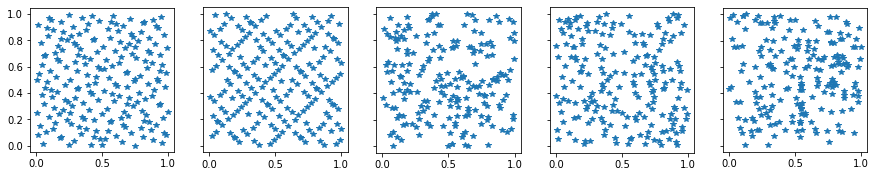

In [9]:
np.random.seed(105)
ri = lambda nmax: np.random.randint(low=200, high=nmax)

fig, axs = plt.subplots(ncols=5, sharey=True, 
                        subplot_kw={'aspect': 1}, 
                        figsize=2*(15,))
axs[0].plot(*qseq[-nsamples:].T, '*')
axs[1].plot(*rng.rand(nsamples, 2).T, '*')
axs[2].plot(*pseq.T, '*')
axs[3].plot(*pqseq.T, '*')
axs[4].plot(*np.random.rand(nsamples, 2).T, '*')

plt.show()

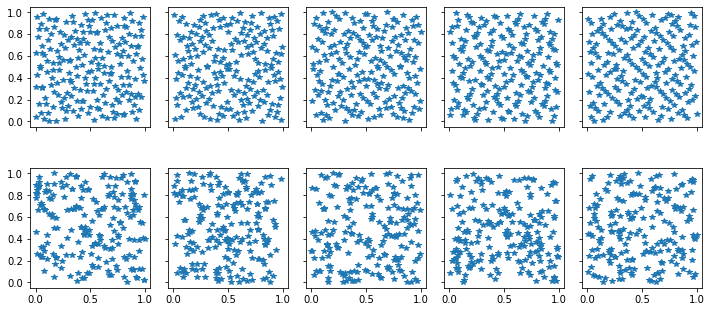

In [10]:
nfig = 5
fig, axs = plt.subplots(ncols=nfig, nrows=2, 
                        sharex=True, sharey=True,
                        subplot_kw={'aspect': 1}, 
                        figsize=(10, 5))
for ii in range(0, nfig):
    axs[0, ii].plot(*rng.rand(nsamples, 2).T, '*')
    axs[1, ii].plot(*np.random.rand(nsamples, 2).T, '*')

plt.tight_layout()
plt.show()